# **Heart Disease**

## Tabela de Conteúdo
1) Importação de bibliotecas + dataset
2) EDA (Análise Exploratória de Dados)
3) Pré-processamento de Dados
    - Limpeza de Dados
    - Normalização de Dados
    - Codificação de Dados
    - Engenharia de Features
    - Divisão de Dados
    - Aumento de Dados
4) Seleção do Modelo
    - Treinamento de Modelos (usando validação cruzada)
    - Comparação de Modelos (múltiplos algoritmos)
    - Otimização de Hiperparâmetros
    - Avaliação do Modelo
5) Salvamento do Melhor Modelo

## 1) Importação de bibliotecas e dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import Counter
import ydata_profiling as pp
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from mlxtend.classifier import StackingCVClassifier

In [2]:
data = pd.read_csv('./db/processed.cleveland.csv', na_values='?')
data.head()

age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  target  
0    3.0  0.0   6.0       0  
1    2.0  3.0   3.0       2  
2    2.0  2.0   7.0       1  
3    3.0  0.0   3.0       0  
4    1.0  0.0   3.0       0

## 2) Análise Exploratória de Dados (EDA)

In [3]:
print(f"Dataset shape: {data.shape}")
print("\nData types:")
print(data.dtypes)


Dataset shape: (303, 14)

Data types:
age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
target        int64
dtype: object


In [4]:
print("\nMissing values:")
print(data.isnull().sum())

print("\nBasic statistics:")
print(data.describe())


Missing values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

Basic statistics:
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     tha

In [5]:
print("\nTarget variable distribution:")
print(data['target'].value_counts())
print(data['target'].value_counts(normalize=True).round(2))


Target variable distribution:
target
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64
target
0    0.54
1    0.18
2    0.12
3    0.12
4    0.04
Name: proportion, dtype: float64


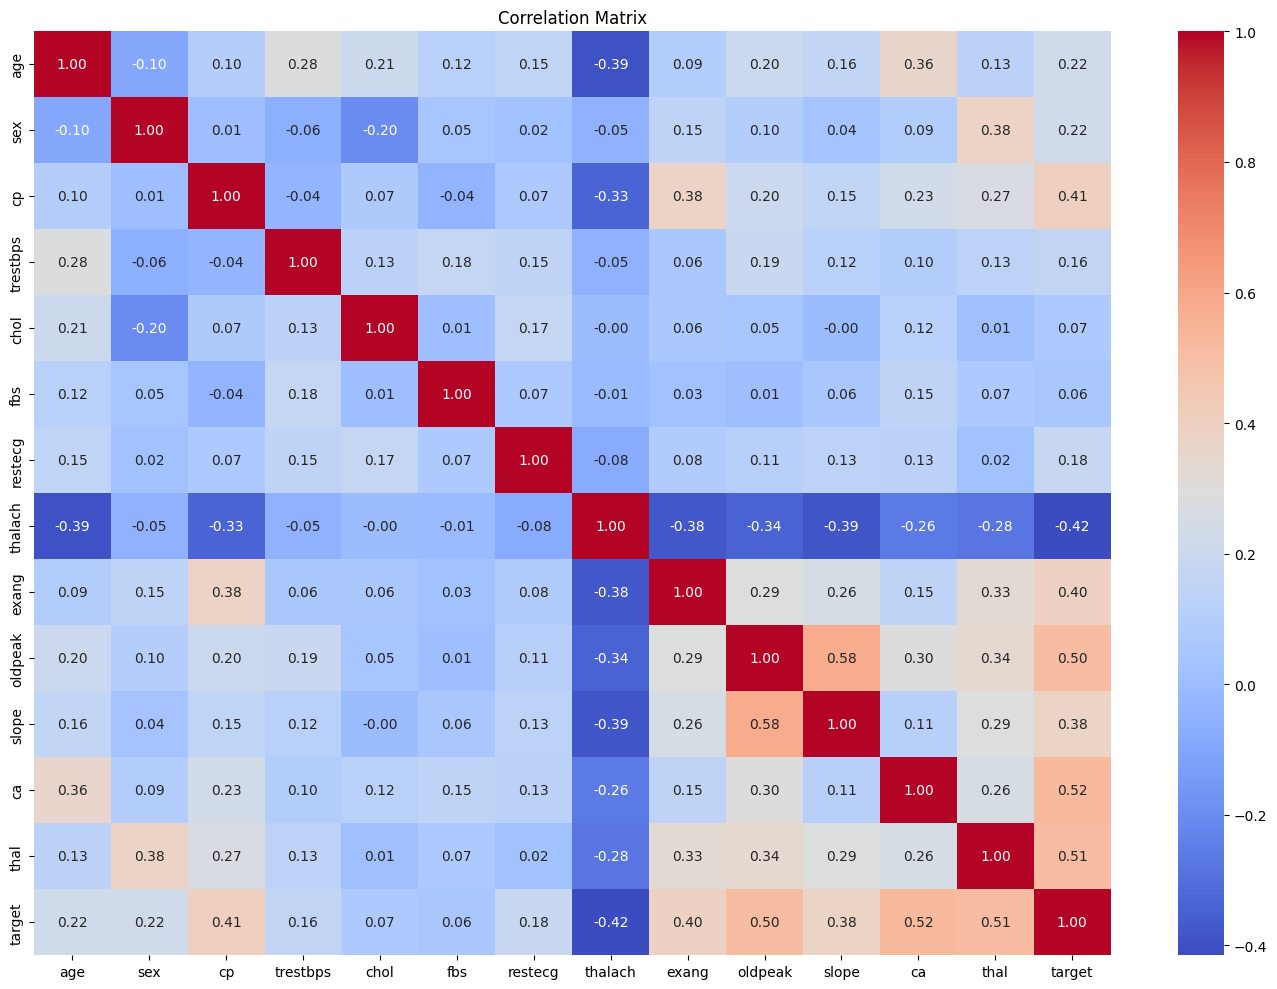

In [6]:
plt.figure(figsize=(14, 10))
correlation_matrix = data.apply(lambda x: pd.factorize(x)[0] if x.dtype == 'object' else x).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

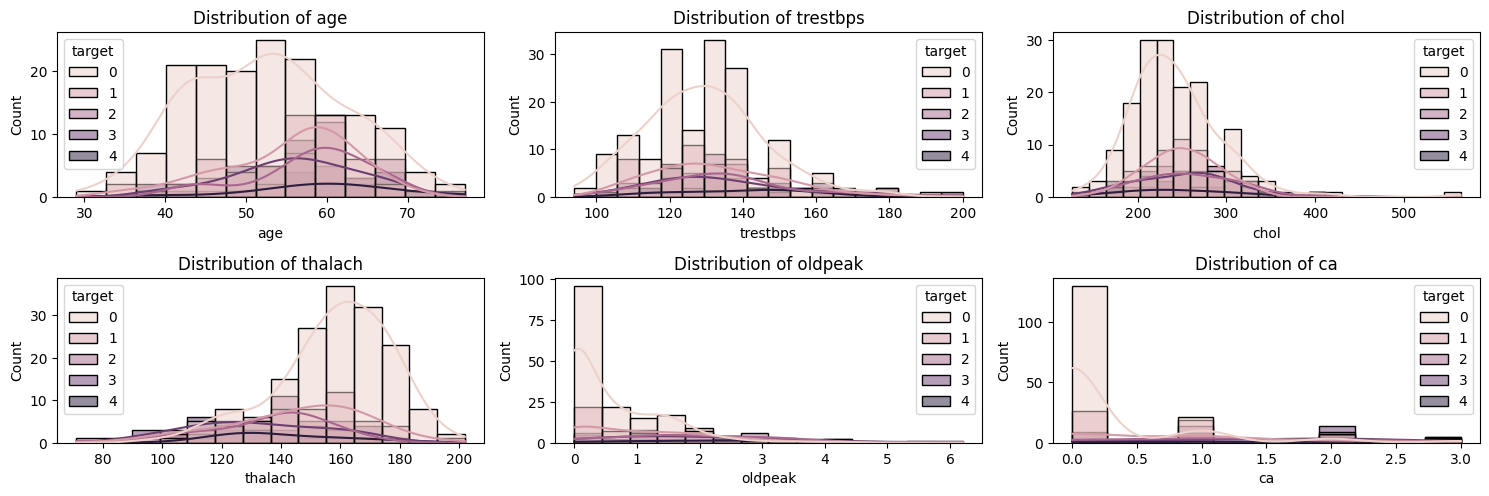

In [7]:
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
plt.figure(figsize=(15, 12))
for i, feature in enumerate(numerical_features):
    plt.subplot(5, 3, i+1)
    sns.histplot(data=data, x=feature, hue='target', kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

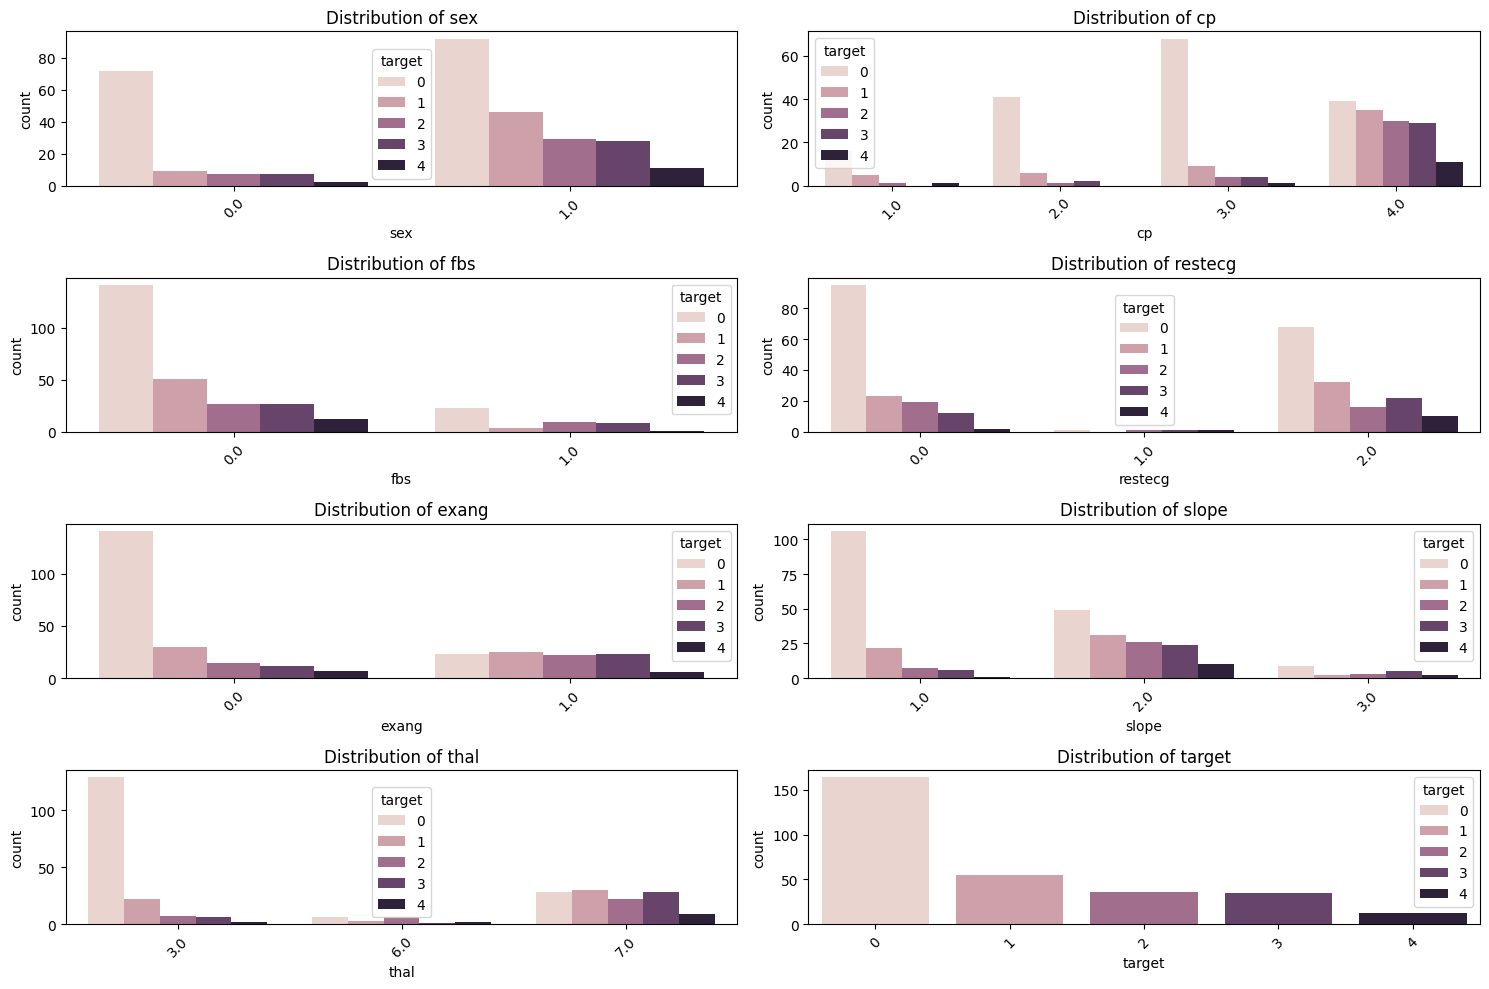

In [8]:
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'target']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features):
    plt.subplot(4, 2, i+1)
    sns.countplot(data=data, x=feature, hue='target')
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


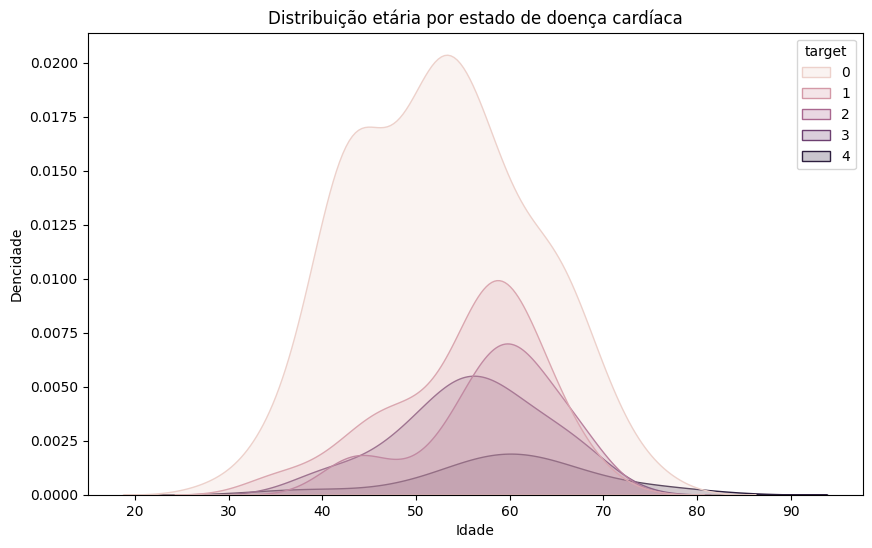

In [9]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x='age', hue='target', fill=True)
plt.title('Distribuição etária por estado de doença cardíaca')
plt.xlabel('Idade')
plt.ylabel('Dencidade')
plt.show()

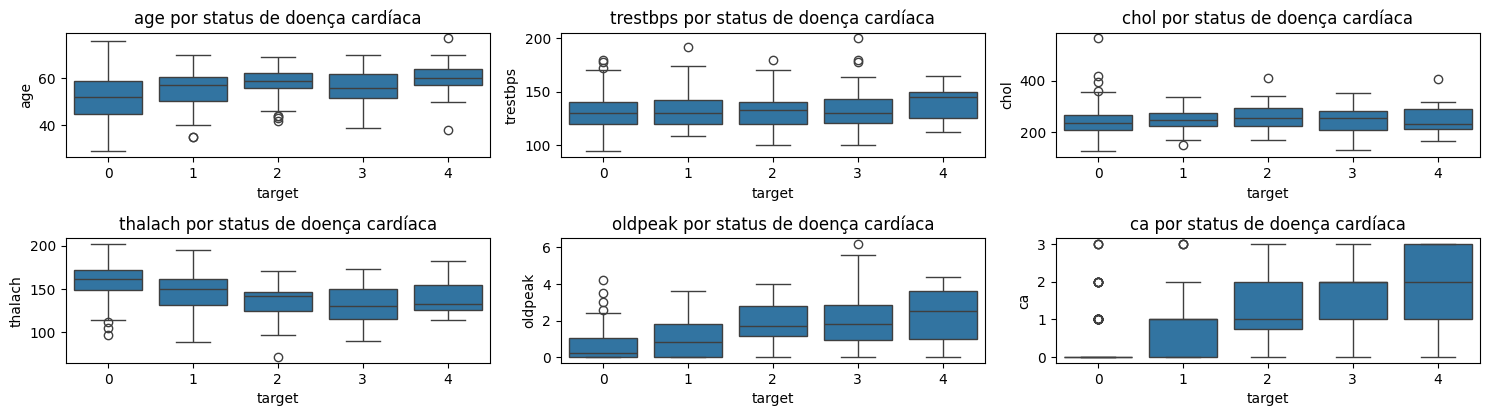

In [10]:
plt.figure(figsize=(15, 10))
subplot_count = 0
for feature in numerical_features:
    if feature != 'sex' and feature != 'fbs' and feature != 'exang':
        subplot_count += 1
        plt.subplot(5, 3, subplot_count)
        sns.boxplot(data=data, x='target', y=feature)
        plt.title(f'{feature} por status de doença cardíaca')
plt.tight_layout()
plt.show()

In [11]:
profile = pp.ProfileReport(data, title="Heart Disease Dataset Profiling Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 14/14 [00:00<00:00, 506.70it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## 3) Pré-processamento de Dados

In [12]:
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values[missing_values > 0])

data['ca'] = pd.to_numeric(data['ca'], errors='coerce')
data['ca'].fillna(data['ca'].median(), inplace=True)

data['thal'].fillna(data['thal'].mode()[0], inplace=True)

print("\nMissing values after imputation:")
print(data.isnull().sum().sum())

Missing values in each column:
ca      4
thal    2
dtype: int64

Missing values after imputation:
0


C:\Users\CCassolF\AppData\Local\Temp\ipykernel_28144\2225969602.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['ca'].fillna(data['ca'].median(), inplace=True)
C:\Users\CCassolF\AppData\Local\Temp\ipykernel_28144\2225969602.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

### Limpeza de Dados

Converta variáveis ​​categóricas em formato numérico para modelos de aprendizado de máquina.

In [13]:
categorical_cols = categorical_features
print("Categorical columns:", categorical_cols)

data_encoded = pd.get_dummies(data, columns=['cp', 'thal'], drop_first=True)

data_encoded['target'] = (data_encoded['target'] > 0).astype(int)

print("\nShape after encoding:", data_encoded.shape)
print("\nEncoded columns:", data_encoded.columns.tolist())

data_encoded = data_encoded.dropna(subset=['target'])

Categorical columns: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'target']

Shape after encoding: (303, 17)

Encoded columns: ['age', 'sex', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'target', 'cp_2.0', 'cp_3.0', 'cp_4.0', 'thal_6.0', 'thal_7.0']


### Normalização de Dados

Padronize características numéricas para que média = 0 e desvio padrão = 1.

In [14]:
numerical_features_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']

scaler = StandardScaler()

data_encoded[numerical_features_to_scale] = scaler.fit_transform(data_encoded[numerical_features_to_scale])

data_encoded[numerical_features_to_scale].describe().T

count          mean       std       min       25%       50%  \
age       303.0 -1.465641e-18  1.001654 -2.819115 -0.713556  0.172994   
trestbps  303.0  4.426236e-16  1.001654 -2.145037 -0.665300 -0.096170   
chol      303.0  2.345026e-16  1.001654 -2.334877 -0.690503 -0.110136   
thalach   303.0 -1.172513e-16  1.001654 -3.442067 -0.705307  0.148562   
oldpeak   303.0  2.345026e-17  1.001654 -0.896862 -0.896862 -0.206705   
ca        303.0 -4.690051e-17  1.001654 -0.711131 -0.711131 -0.711131   

               75%       max  
age       0.727089  2.500191  
trestbps  0.472960  3.887739  
chol      0.547614  6.138485  
thalach   0.717808  2.294182  
oldpeak   0.483451  4.451851  
ca        0.360873  2.504881

### Engenharia de Features

Cria novos recursos que possam ser úteis para previsão.

In [15]:
data_encoded['AgeGroup'] = pd.cut(data['age'], bins=[0, 40, 55, 65, 100], 
labels=['Young', 'Middle-aged', 'Senior', 'Elderly'])

data_encoded = pd.get_dummies(data_encoded, columns=['AgeGroup'], drop_first=True)

data_encoded['BP_per_Age'] = data['trestbps'] / data['age']
data_encoded['HR_per_Age'] = data['thalach'] / data['age']

print("Dataset shape after feature engineering:", data_encoded.shape)
data_encoded.head()

Dataset shape after feature engineering: (303, 22)


age  sex  trestbps      chol  fbs  restecg   thalach  exang   oldpeak  \
0  0.948726  1.0  0.757525 -0.264900  1.0      2.0  0.017197    0.0  1.087338   
1  1.392002  1.0  1.611220  0.760415  0.0      2.0 -1.821905    1.0  0.397182   
2  1.392002  1.0 -0.665300 -0.342283  0.0      2.0 -0.902354    1.0  1.346147   
3 -1.932564  1.0 -0.096170  0.063974  0.0      0.0  1.637359    0.0  2.122573   
4 -1.489288  0.0 -0.096170 -0.825922  0.0      2.0  0.980537    0.0  0.310912   

   slope  ...  cp_2.0  cp_3.0  cp_4.0  thal_6.0  thal_7.0  \
0    3.0  ...   False   False   False      True     False   
1    2.0  ...   False   False    True     False     False   
2    2.0  ...   False   False    True     False      True   
3    3.0  ...   False    True   False     False     False   
4    1.0  ...    True   False   False     False     False   

   AgeGroup_Middle-aged  AgeGroup_Senior  AgeGroup_Elderly  BP_per_Age  \
0                 False             True             False    2.301587   
1                 False            False              True    2.388060   
2                 False            False              True    1.791045   
3                 False            False             False    3.513514   
4                  True            False             False    3.170732   

   HR_per_Age  
0    2.380952  
1    1.611940  
2    1.925373  
3    5.054054  
4    4.195122  

[5 rows x 22 columns]

### Divisão de Dados

Divide o conjunto de dados em conjuntos de treinamento e teste.

In [16]:
X = data_encoded.drop('target', axis=1)
y = data_encoded['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

print("\nClass distribution in training set:")
print(y_train.value_counts(normalize=True))
print("\nClass distribution in test set:")
print(y_test.value_counts(normalize=True))

X_train shape: (242, 21)
X_test shape: (61, 21)
y_train shape: (242,)
y_test shape: (61,)

Class distribution in training set:
target
0    0.541322
1    0.458678
Name: proportion, dtype: float64

Class distribution in test set:
target
0    0.540984
1    0.459016
Name: proportion, dtype: float64


### Aumento de Dados

Implementa técnicas de aumento de dados para lidar com desequilíbrio de classes, se necessário.

Distribuição das classes antes do SMOTE:
target
0    131
1    111
Name: count, dtype: int64


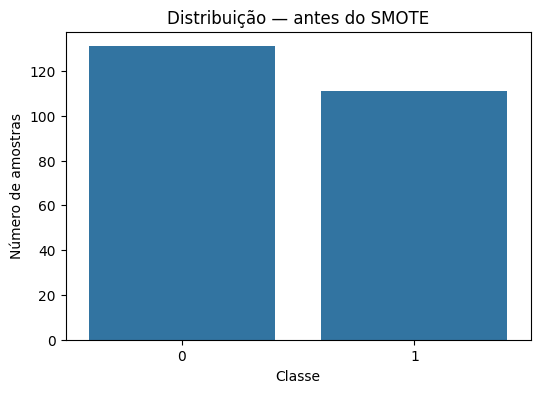

Desequilíbrio abaixo de 20%. SMOTE não aplicado.


In [17]:
# class_counts = y_train.value_counts()
# print("Class distribution before augmentation:")
# print(class_counts)

# if abs(class_counts[0] - class_counts[1]) / len(y_train) > 0.2:  # If imbalance exceeds 20%
#     from imblearn.over_sampling import SMOTE
    
#     smote = SMOTE(random_state=42)
#     X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    
#     print("\nClass distribution after SMOTE:")
#     print(pd.Series(y_train_resampled).value_counts())
    
#     X_train = X_train_resampled
#     y_train = y_train_resampled
    
#     print(f"\nNew X_train shape: {X_train.shape}")
# else:
#     print("\nNo significant class imbalance detected. Skipping augmentation.")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA

# --- 1. Avaliar desequilíbrio inicial ---
class_counts = y_train.value_counts()
print("Distribuição das classes antes do SMOTE:")
print(class_counts)

# Gráfico 1: barras da distribuição inicial
plt.figure(figsize=(6,4))
sns.countplot(x=y_train)
plt.title("Distribuição — antes do SMOTE")
plt.xlabel("Classe")
plt.ylabel("Número de amostras")
plt.show()

# --- 2. Verificar desequilíbrio e aplicar SMOTE, se necessário ---
if abs(class_counts[0] - class_counts[1]) / len(y_train) > 0.2:
    smote = SMOTE(random_state=42)
    X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
    
    # Gráfico 2: barras da distribuição após SMOTE
    plt.figure(figsize=(6,4))
    sns.countplot(x=y_train_res)
    plt.title("Distribuição — após o SMOTE")
    plt.xlabel("Classe")
    plt.ylabel("Número de amostras")
    plt.show()
    
    # --- 3. Visualização via PCA (se quiser mostrar os pontos sintéticos) ---
    pca = PCA(n_components=2, random_state=42)
    X_vis_orig = pca.fit_transform(X_train)
    X_vis_res = pca.transform(X_train_res)

    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    sns.scatterplot(x=X_vis_orig[:,0], y=X_vis_orig[:,1], hue=y_train, alpha=0.5, palette="deep")
    plt.title("Amostras originais (PCA)")
    plt.xlabel("PC1"); plt.ylabel("PC2")

    plt.subplot(1,2,2)
    sns.scatterplot(x=X_vis_res[:,0], y=X_vis_res[:,1], hue=y_train_res, alpha=0.5, palette="deep")
    plt.title("Após SMOTE (PCA)")
    plt.xlabel("PC1"); plt.ylabel("PC2")
    plt.show()
    
    # Atualiza os dados de treino
    X_train, y_train = X_train_res, y_train_res
    print("\nNovo shape de X_train:", X_train.shape)
else:
    print("Desequilíbrio abaixo de 20%. SMOTE não aplicado.")


## 4) Seleção do Modelo

Nesta seção, construiremos e avaliaremos múltiplos modelos de aprendizado de máquina para predição de doenças cardíacas:
1. Treinar modelos usando validação cruzada
2. Comparar o desempenho dos modelos
3. Ajustar os hiperparâmetros dos melhores modelos
4. Avaliar o desempenho final do modelo

### Treinamento de Modelos (usando validação cruzada)

Treinaremos vários modelos de classificação usando validação cruzada k-fold para obter uma estimativa confiável de seu desempenho.

Model: Logistic Regression
Mean Accuracy: 0.8263 (±0.0224)
Mean ROC-AUC: 0.9051 (±0.0223)
Mean F1 Score: 0.8023 (±0.0181)
--------------------------------------------------


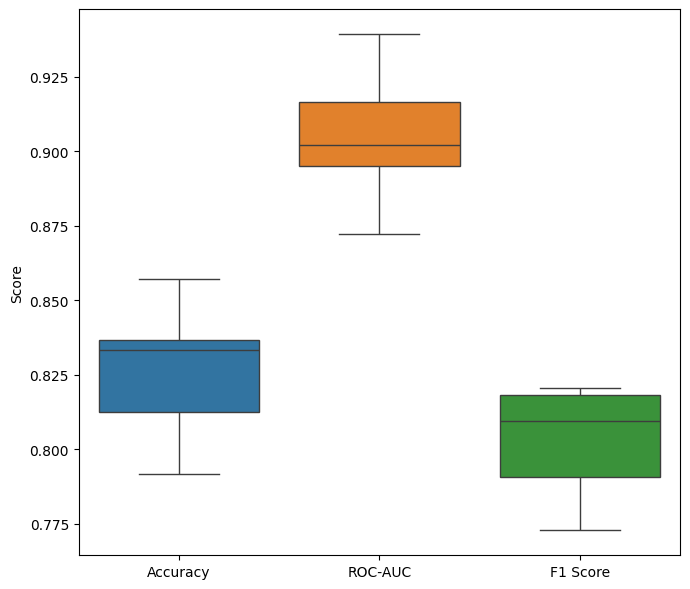

Model: Decision Tree
Mean Accuracy: 0.6986 (±0.0636)
Mean ROC-AUC: 0.6981 (±0.0625)
Mean F1 Score: 0.6795 (±0.0646)
--------------------------------------------------


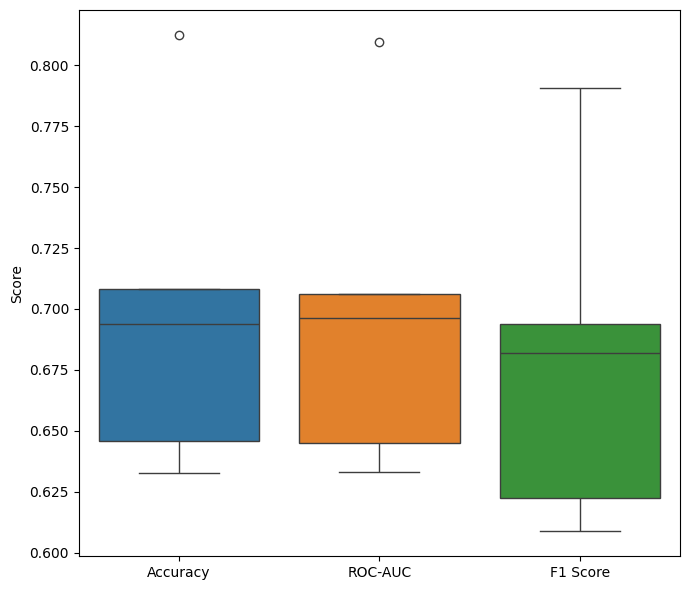

Model: K-Nearest Neighbors
Mean Accuracy: 0.8099 (±0.0400)
Mean ROC-AUC: 0.8672 (±0.0329)
Mean F1 Score: 0.7884 (±0.0440)
--------------------------------------------------


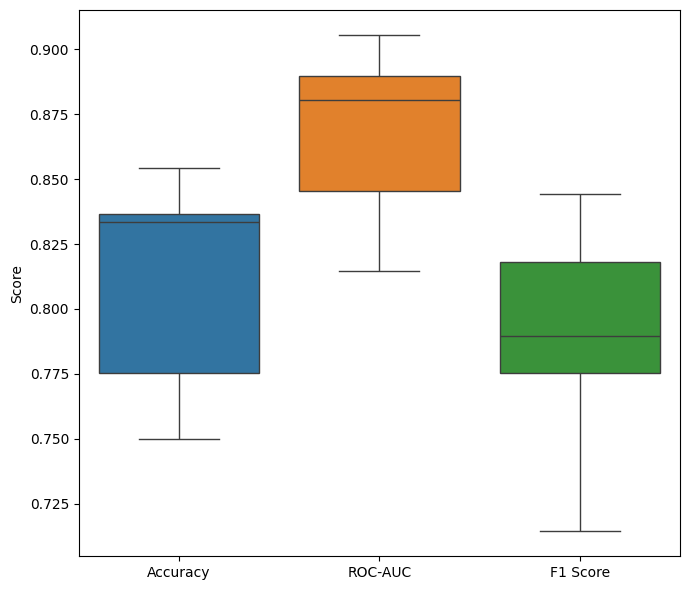

Model: Support Vector Machine
Mean Accuracy: 0.8264 (±0.0174)
Mean ROC-AUC: 0.8942 (±0.0147)
Mean F1 Score: 0.7911 (±0.0246)
--------------------------------------------------


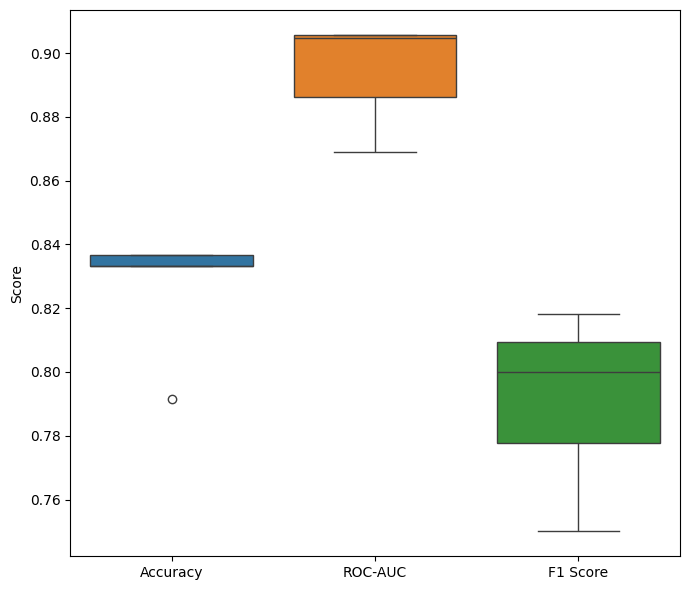

Model: Neural Network
Mean Accuracy: 0.7723 (±0.0629)
Mean ROC-AUC: 0.8454 (±0.0486)
Mean F1 Score: 0.7538 (±0.0636)
--------------------------------------------------


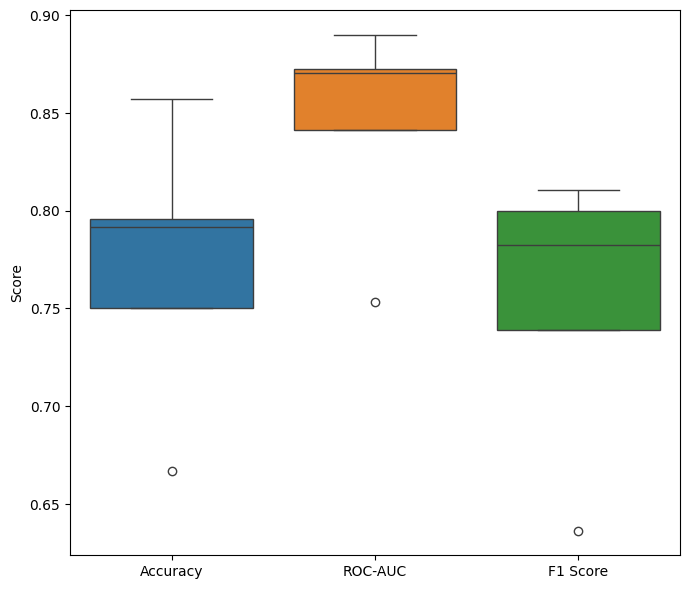

In [18]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
# from sklearn.neural_network import MLPClassifier
# from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


# models = {
#     'Logistic Regression': LogisticRegression(max_iter=1000),
#     'Decision Tree': DecisionTreeClassifier(random_state=42),
#     'K-Nearest Neighbors': KNeighborsClassifier(),
#     'Support Vector Machine': SVC(probability=True, random_state=42),
#     'Neural Network': MLPClassifier(random_state=42, max_iter=1000)
# }

# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# cv_results = {}

# for name, model in models.items():
#     cv_accuracy = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
#     cv_roc_auc = cross_val_score(model, X_train, y_train, cv=cv, scoring='roc_auc')
#     cv_f1 = cross_val_score(model, X_train, y_train, cv=cv, scoring='f1')

#     cv_results[name] = {
#         'Accuracy': cv_accuracy,
#         'ROC-AUC': cv_roc_auc,
#         'F1 Score': cv_f1
#     }
    
#     print(f"Model: {name}")
#     print(f"Mean Accuracy: {cv_accuracy.mean():.4f} (±{cv_accuracy.std():.4f})")
#     print(f"Mean ROC-AUC: {cv_roc_auc.mean():.4f} (±{cv_roc_auc.std():.4f})")
#     print(f"Mean F1 Score: {cv_f1.mean():.4f} (±{cv_f1.std():.4f})")
#     print('-'*50)

#     cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# cv_results = {}

# output_dir = 'cross-val'
# os.makedirs(output_dir, exist_ok=True)

# for name, model in models.items():
#     cv_accuracy = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
#     cv_roc_auc = cross_val_score(model, X_train, y_train, cv=cv, scoring='roc_auc')
#     cv_f1 = cross_val_score(model, X_train, y_train, cv=cv, scoring='f1')

#     cv_results[name] = {
#         'Accuracy': cv_accuracy,
#         'ROC-AUC': cv_roc_auc,
#         'F1 Score': cv_f1
#     }
    
#     print(f"Model: {name}")
#     print(f"Mean Accuracy: {cv_accuracy.mean():.4f} (±{cv_accuracy.std():.4f})")
#     print(f"Mean ROC-AUC: {cv_roc_auc.mean():.4f} (±{cv_roc_auc.std():.4f})")
#     print(f"Mean F1 Score: {cv_f1.mean():.4f} (±{cv_f1.std():.4f})")
#     print('-'*50)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import os

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(probability=True, random_state=42),
    'Neural Network': MLPClassifier(random_state=42, max_iter=1000)
}


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_results = {}

output_dir = 'cross-val'
os.makedirs(output_dir, exist_ok=True)

for name, model in models.items():
    cv_accuracy = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    cv_roc_auc = cross_val_score(model, X_train, y_train, cv=cv, scoring='roc_auc')
    cv_f1 = cross_val_score(model, X_train, y_train, cv=cv, scoring='f1')

    cv_results[name] = {
        'Accuracy': cv_accuracy,
        'ROC-AUC': cv_roc_auc,
        'F1 Score': cv_f1
    }
    
    print(f"Model: {name}")
    print(f"Mean Accuracy: {cv_accuracy.mean():.4f} (±{cv_accuracy.std():.4f})")
    print(f"Mean ROC-AUC: {cv_roc_auc.mean():.4f} (±{cv_roc_auc.std():.4f})")
    print(f"Mean F1 Score: {cv_f1.mean():.4f} (±{cv_f1.std():.4f})")
    print('-'*50)
    
    # Visualização dos scores em um único gráfico boxplot
    scores_df = pd.DataFrame({
        'Accuracy': cv_accuracy,
        'ROC-AUC': cv_roc_auc,
        'F1 Score': cv_f1
    })
    plt.figure(figsize=(7, 6))
    sns.boxplot(data=scores_df)
    plt.ylabel('Score')
    # plt.title(f'Cross-Validation Scores — {name}')
    plt.tight_layout()
    
    # Salvar o gráfico na pasta cross-val antes de fechar
    filename = name.lower().replace(" ", "_") + "_cv_boxplot.png"
    plt.savefig(os.path.join(output_dir, filename), bbox_inches='tight')
    plt.show()
    plt.close()


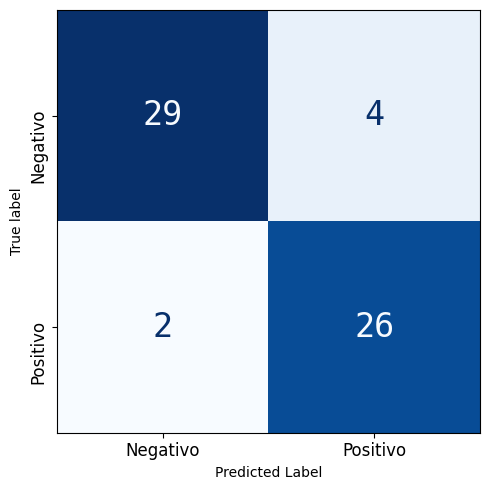

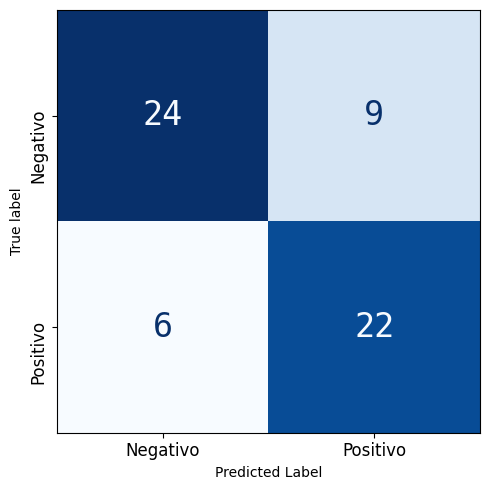

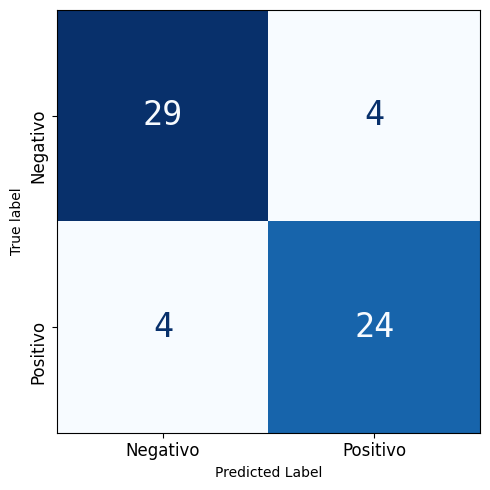

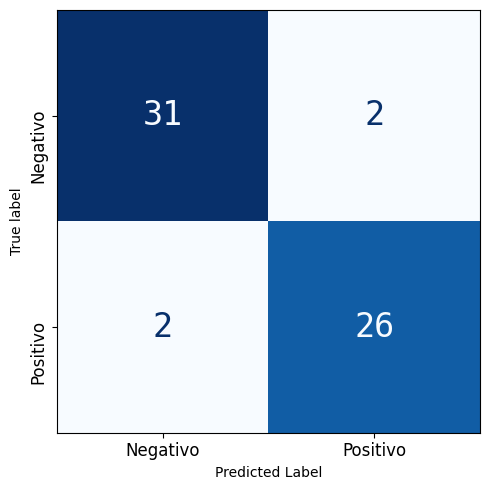

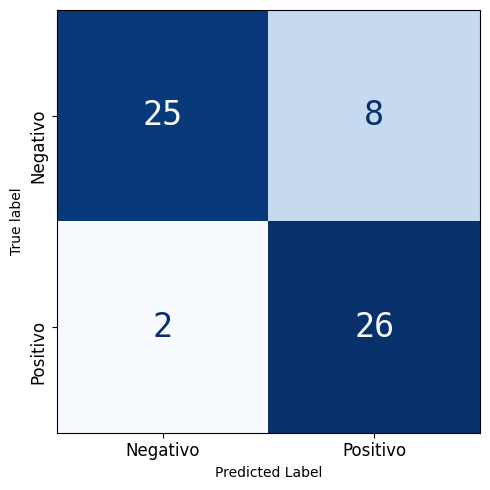

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay
import os

# Cria a pasta se não existir
output_dir = "model-conf-matrix"
os.makedirs(output_dir, exist_ok=True)

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    fig, ax = plt.subplots(figsize=(6, 5))
    disp.plot(ax=ax, colorbar=False, cmap='Blues')
    ax.set_xlabel('Predicted Label', fontsize=10)
    ax.set_ylabel('True label', fontsize=10)
    # ax.set_title(f'Matriz de Confusão — {name}')
    ax.set_xticklabels(['Negativo', 'Positivo'], fontsize=12)
    ax.set_yticklabels(['Negativo', 'Positivo'], rotation=90, fontsize=12)

    # Altera fonte dos números da matriz
    for text in ax.texts:
        text.set_fontsize(24)
        text.set_fontfamily('monospace')  # ou 'serif', 'sans-serif', etc.

    plt.tight_layout()
    plt.show()
    
    filename = name.lower().replace(" ", "-") + ".png"
    fig.savefig(os.path.join(output_dir, filename), bbox_inches='tight')
    plt.close(fig)

### Comparação de Modelos

Vamos comparar o desempenho de diferentes modelos com base nos resultados da validação cruzada.

In [20]:
cv_accuracy_df = pd.DataFrame({name: results['Accuracy'] for name, results in cv_results.items()})
cv_roc_auc_df = pd.DataFrame({name: results['ROC-AUC'] for name, results in cv_results.items()})
cv_f1_df = pd.DataFrame({name: results['F1 Score'] for name, results in cv_results.items()})

cv_means = pd.DataFrame({
    'Mean Accuracy': cv_accuracy_df.mean(),
    'Mean ROC-AUC': cv_roc_auc_df.mean(),
    'Mean F1 Score': cv_f1_df.mean()
}).sort_values(by='Mean ROC-AUC', ascending=False)

cv_std = pd.DataFrame({
    'Std Accuracy': cv_accuracy_df.std(),
    'Std ROC-AUC': cv_roc_auc_df.std(),
    'Std F1 Score': cv_f1_df.std()
})

print("Modelos ranqueados pela pontuação do ROC-AUC:")
print(cv_means)

print("Modelos ranqueados pela pontuação do desvio padrão:")
print(cv_std)

Modelos ranqueados pela pontuação do ROC-AUC:
                        Mean Accuracy  Mean ROC-AUC  Mean F1 Score
Logistic Regression          0.826276      0.905072       0.802329
Support Vector Machine       0.826361      0.894249       0.791097
K-Nearest Neighbors          0.809949      0.867186       0.788379
Neural Network               0.772279      0.845448       0.753783
Decision Tree                0.698639      0.698065       0.679462
Modelos ranqueados pela pontuação do desvio padrão:
                        Std Accuracy  Std ROC-AUC  Std F1 Score
Logistic Regression         0.024998     0.024916      0.020281
Decision Tree               0.071105     0.069845      0.072234
K-Nearest Neighbors         0.044720     0.036744      0.049214
Support Vector Machine      0.019469     0.016393      0.027472
Neural Network              0.070333     0.054296      0.071100


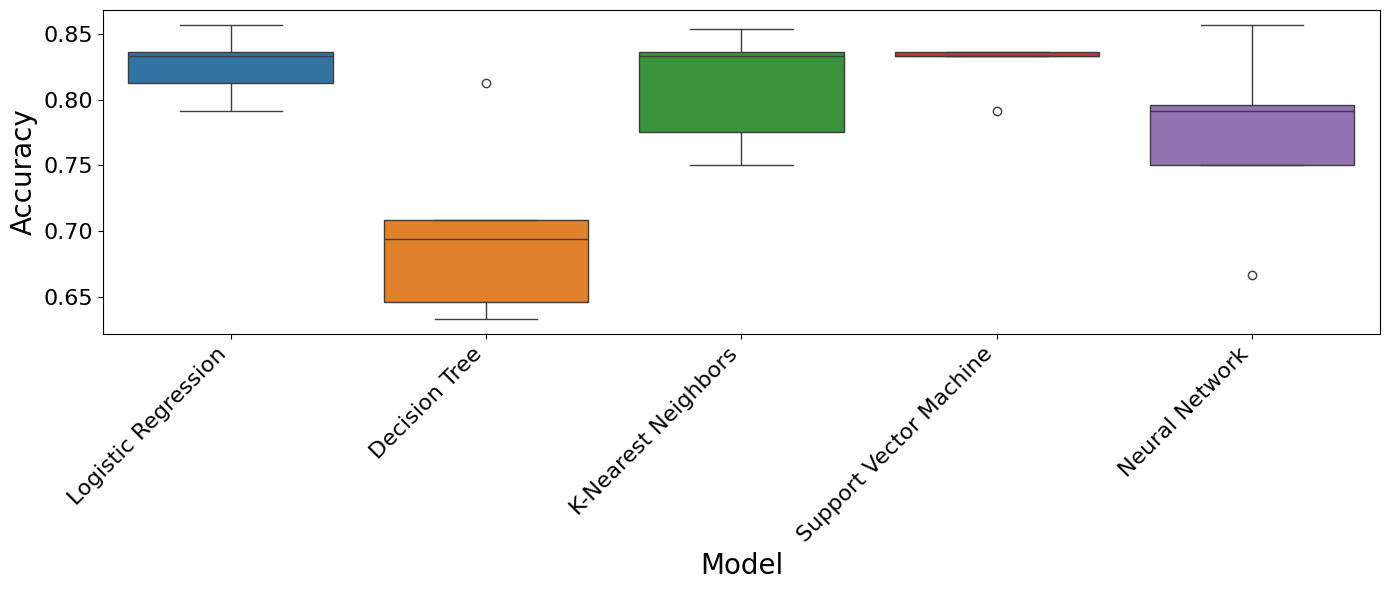

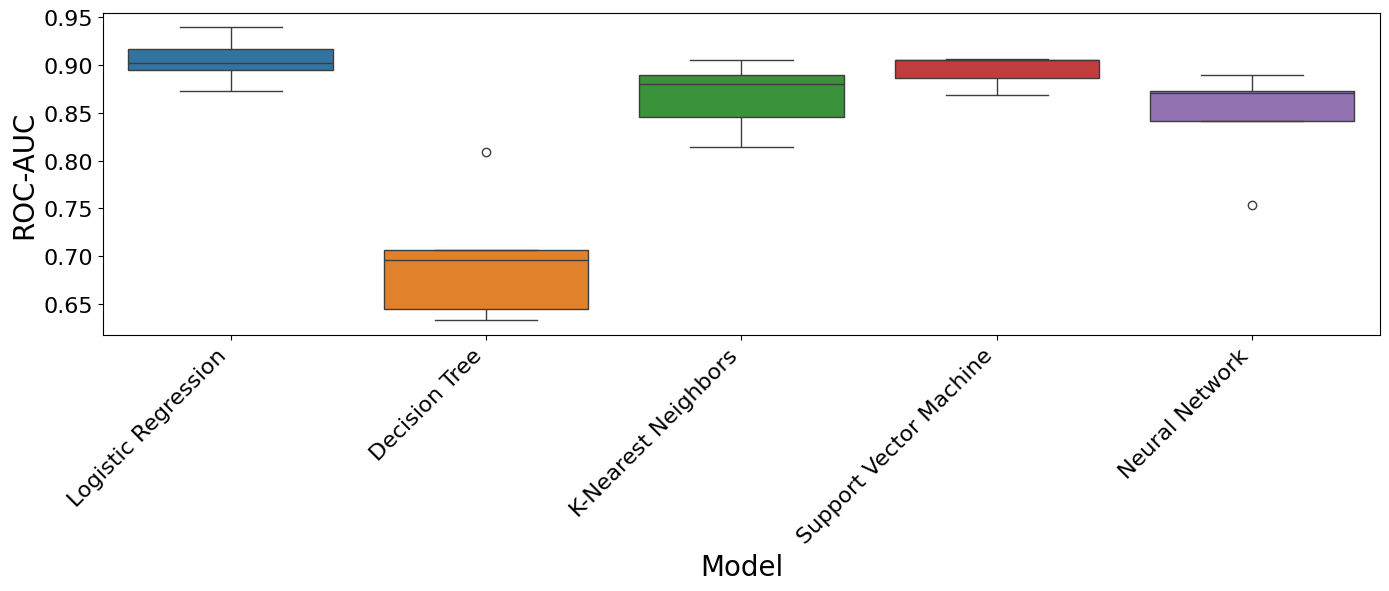

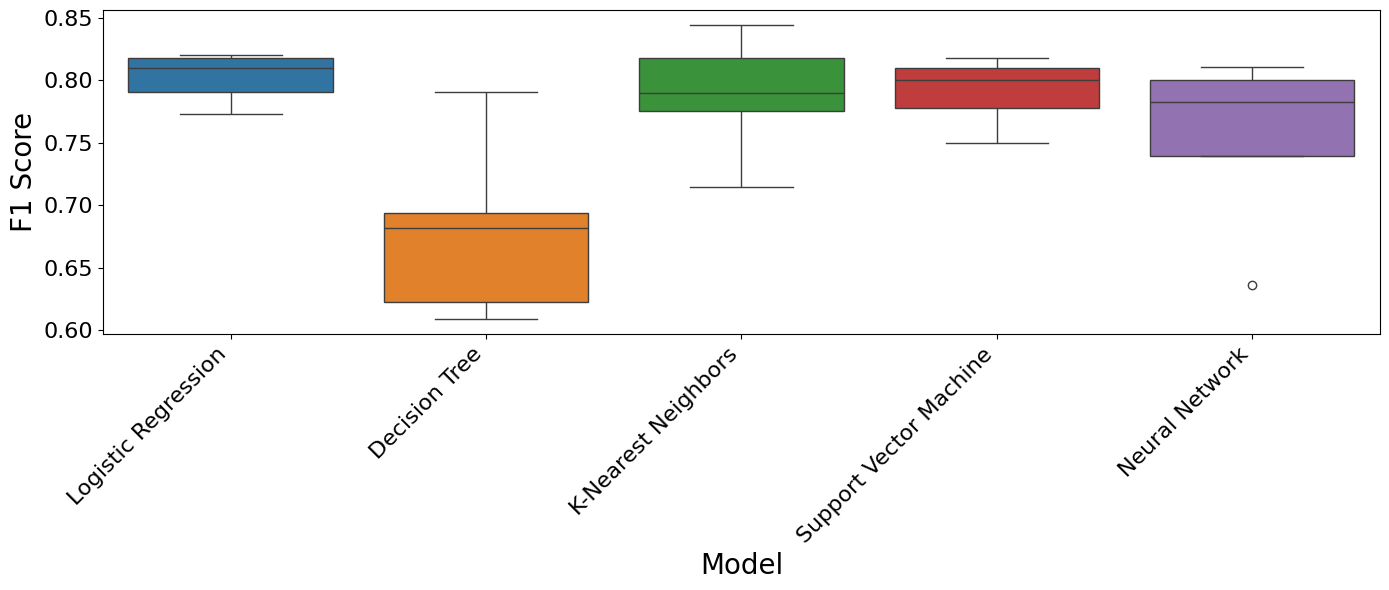

In [21]:
import os

# plt.figure(figsize=(14, 6))
# ax = sns.boxplot(data=cv_accuracy_df)
# ax.set_title('Cross-Validation Accuracy Comparison', fontsize=16)
# ax.set_xlabel('Model', fontsize=12)
# ax.set_ylabel('Accuracy', fontsize=12)
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# plt.show()

# plt.figure(figsize=(14, 6))
# ax = sns.boxplot(data=cv_roc_auc_df)
# ax.set_title('Cross-Validation ROC-AUC Comparison', fontsize=16)
# ax.set_xlabel('Model', fontsize=12)
# ax.set_ylabel('ROC-AUC', fontsize=12)
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# plt.show()

# plt.figure(figsize=(14, 6))
# ax = sns.boxplot(data=cv_f1_df)
# ax.set_title('Cross-Validation F1 Score Comparison', fontsize=16)
# ax.set_xlabel('Model', fontsize=12)
# ax.set_ylabel('F1 Score', fontsize=12)
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# plt.show()

output_dir = 'cross-val-acuracy'
os.makedirs(output_dir, exist_ok=True)

plt.figure(figsize=(14, 6))
ax = sns.boxplot(data=cv_accuracy_df)
# ax.set_title('Cross-Validation Accuracy Comparison', fontsize=16)
ax.set_xlabel('Model', fontsize=20)
ax.set_ylabel('Accuracy', fontsize=20)
plt.xticks(rotation=45, ha='right', fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'cv_accuracy_comparison.png'), bbox_inches='tight')
plt.show()

plt.figure(figsize=(14, 6))
ax = sns.boxplot(data=cv_roc_auc_df)
# ax.set_title('Cross-Validation ROC-AUC Comparison', fontsize=16)
ax.set_xlabel('Model', fontsize=20)
ax.set_ylabel('ROC-AUC', fontsize=20)
plt.xticks(rotation=45, ha='right', fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'cv_roc_auc_comparison.png'), bbox_inches='tight')
plt.show()

plt.figure(figsize=(14, 6))
ax = sns.boxplot(data=cv_f1_df)
# ax.set_title('Cross-Validation F1 Score Comparison', fontsize=16)
ax.set_xlabel('Model', fontsize=20)
ax.set_ylabel('F1 Score', fontsize=20)
plt.xticks(rotation=45, ha='right', fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'cv_f1_score_comparison.png'), bbox_inches='tight')
plt.show()

### Otimização de Hiperparâmetros

Vamos selecionar os modelos de melhor desempenho da nossa comparação e otimizar seus hiperparâmetros usando a Pesquisa em Grade ou a Pesquisa Aleatória com um espaço de parâmetros simplificado para evitar problemas de memória.

In [22]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer, roc_auc_score

print("Tuning Logistic Regression hyperparameters...")

lr_param_grid = [
    {'penalty': ['l2'], 'C': [0.1, 1, 10], 'solver': ['lbfgs'], 'max_iter': [1000]},
    {'penalty': ['none'], 'solver': ['lbfgs'], 'max_iter': [1000]}
]

try:
    lr_random = RandomizedSearchCV(
        estimator=LogisticRegression(random_state=42),
        param_distributions=lr_param_grid,
        n_iter=2,
        scoring='roc_auc',
        cv=3,
        verbose=1,
        random_state=42,
        n_jobs=1
    )

    lr_random.fit(X_train, y_train)

    print(f"Best parameters: {lr_random.best_params_}")
    print(f"Best score: {lr_random.best_score_:.4f}")
    print("-"*50)

    best_lr = lr_random.best_estimator_
    
except Exception as e:
    print(f"Error during Logistic Regression tuning: {e}")
    print("Using default Logistic Regression model instead")
    best_lr = LogisticRegression(
        random_state=42,
        max_iter=1000
    )
    best_lr.fit(X_train, y_train)

Tuning Logistic Regression hyperparameters...
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best parameters: {'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 1000, 'C': 1}
Best score: 0.8976
--------------------------------------------------


c:\Users\CCassolF\www\unijui\TCC\NewCardioCheckAI\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
3 fits failed out of a total of 6.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\CCassolF\www\unijui\TCC\NewCardioCheckAI\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\CCassolF\www\unijui\TCC\NewCardioCheckAI\.venv\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\CCassolF\www\unijui\TCC\NewCardioCheckAI\.venv\Lib\site-packages\sklearn\base.p

In [23]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier

print("Tuning K-Nearest Neighbors hyperparameters...")

knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

try:
    knn_random = RandomizedSearchCV(
        estimator=KNeighborsClassifier(),
        param_distributions=knn_param_grid,
        n_iter=10,
        scoring='roc_auc',
        cv=3,
        verbose=1,
        random_state=42,
        n_jobs=1
    )

    knn_random.fit(X_train, y_train)

    print(f"Best parameters: {knn_random.best_params_}")
    print(f"Best score: {knn_random.best_score_:.4f}")
    print("-" * 50)

    best_knn = knn_random.best_estimator_

except Exception as e:
    print(f"Error during KNN tuning: {e}")
    print("Using default KNeighborsClassifier model instead")
    best_knn = KNeighborsClassifier()
    best_knn.fit(X_train, y_train)

Tuning K-Nearest Neighbors hyperparameters...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters: {'weights': 'distance', 'n_neighbors': 13, 'metric': 'manhattan'}
Best score: 0.8797
--------------------------------------------------


In [24]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC

print("Tuning Support Vector Machine hyperparameters...")

svc_param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.01, 0.001, 0.0001]
}

try:
    svc_random = RandomizedSearchCV(
        estimator=SVC(probability=True, random_state=42),
        param_distributions=svc_param_grid,
        n_iter=10,
        scoring='roc_auc',
        cv=3,
        verbose=1,
        random_state=42,
        n_jobs=1
    )

    svc_random.fit(X_train, y_train)

    print(f"Best parameters: {svc_random.best_params_}")
    print(f"Best score: {svc_random.best_score_:.4f}")
    print("-" * 50)

    best_svc = svc_random.best_estimator_

except Exception as e:
    print(f"Error during SVC tuning: {e}")
    print("Using default SVC model instead")
    best_svc = SVC(probability=True, random_state=42)
    best_svc.fit(X_train, y_train)


Tuning Support Vector Machine hyperparameters...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters: {'kernel': 'linear', 'gamma': 'scale', 'C': 0.1}
Best score: 0.8971
--------------------------------------------------


### Avaliação do Modelo

Agora, vamos avaliar nossos modelos ajustados no conjunto de testes para avaliar seu desempenho.

Evaluating the best models on the test set...


Logistic Regression  Support Vector Machine  K-Nearest Neighbors
Acurácia             0.901639                0.901639             0.852459
Precisão             0.866667                0.892857             0.827586
Recall               0.928571                0.892857             0.857143
F1 Score             0.896552                0.892857             0.842105
ROC-AUC              0.961039                0.961039             0.948052

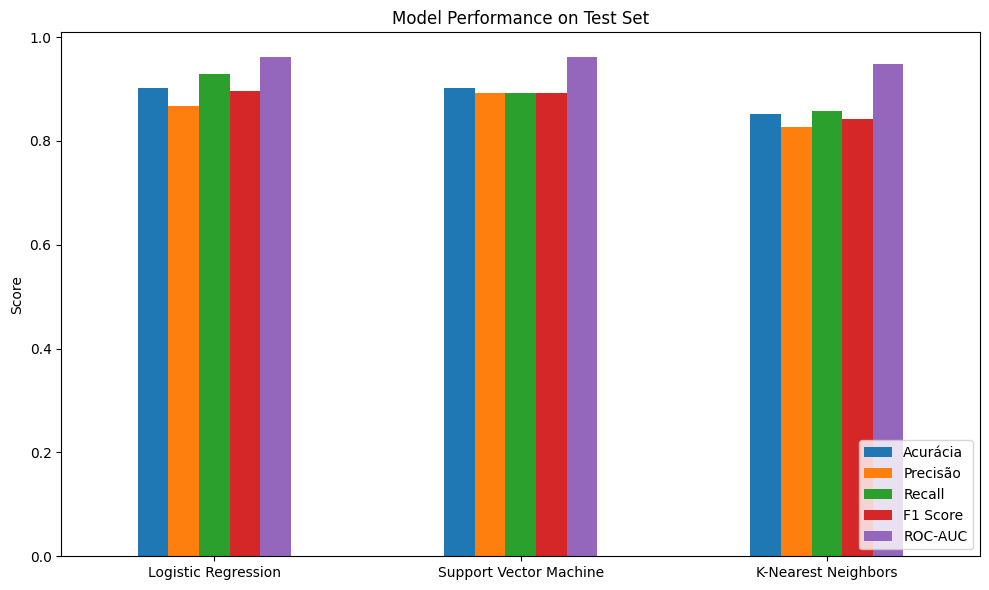

In [25]:
import pandas as pd

# def evaluate_model(model, X_test, y_test):
#     y_pred = model.predict(X_test)
#     y_pred_proba = model.predict_proba(X_test)[:, 1]
    
#     accuracy = accuracy_score(y_test, y_pred)
#     precision = precision_score(y_test, y_pred)
#     recall = recall_score(y_test, y_pred)
#     f1 = f1_score(y_test, y_pred)
#     roc_auc = roc_auc_score(y_test, y_pred_proba)
    
#     return {
#         'accuracy': accuracy,
#         'precision': precision,
#         'recall': recall,
#         'f1_score': f1,
#         'roc_auc': roc_auc,
#         'confusion_matrix': confusion_matrix(y_test, y_pred),
#         'y_pred': y_pred,
#         'y_pred_proba': y_pred_proba
#     }

# print("Evaluating the best models on the test set...")

# lr_eval = evaluate_model(best_lr, X_test, y_test)
# print("Logistic Regression Performance:")
# print(f"Accuracy: {lr_eval['accuracy']:.4f}")
# print(f"Precision: {lr_eval['precision']:.4f}")
# print(f"Recall: {lr_eval['recall']:.4f}")
# print(f"F1 Score: {lr_eval['f1_score']:.4f}")
# print(f"ROC-AUC: {lr_eval['roc_auc']:.4f}")
# print("Confusion Matrix:")
# print(lr_eval['confusion_matrix'])
# print("-"*50)

# svc_eval = evaluate_model(best_svc, X_test, y_test)
# print("Support Vector Machine Performance:")
# print(f"Accuracy: {svc_eval['accuracy']:.4f}")
# print(f"Precision: {svc_eval['precision']:.4f}")
# print(f"Recall: {svc_eval['recall']:.4f}")
# print(f"F1 Score: {svc_eval['f1_score']:.4f}")
# print(f"ROC-AUC: {svc_eval['roc_auc']:.4f}")
# print("Confusion Matrix:")
# print(svc_eval['confusion_matrix'])
# print("-"*50)

# knn_eval = evaluate_model(best_knn, X_test, y_test)
# print("K-Nearest Neighbors Performance:")
# print(f"Accuracy: {knn_eval['accuracy']:.4f}")
# print(f"Precision: {knn_eval['precision']:.4f}")
# print(f"Recall: {knn_eval['recall']:.4f}")
# print(f"F1 Score: {knn_eval['f1_score']:.4f}")
# print(f"ROC-AUC: {knn_eval['roc_auc']:.4f}")
# print("Confusion Matrix:")
# print(knn_eval['confusion_matrix'])
# print("-"*50)


def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc,
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }

print("Evaluating the best models on the test set...")

lr_eval = evaluate_model(best_lr, X_test, y_test)
svc_eval = evaluate_model(best_svc, X_test, y_test)
knn_eval = evaluate_model(best_knn, X_test, y_test)

import matplotlib.pyplot as plt

# Organize results in a DataFrame
results_df = pd.DataFrame({
    "Logistic Regression": {
        "Acurácia": lr_eval['accuracy'],
        "Precisão": lr_eval['precision'],
        "Recall": lr_eval['recall'],
        "F1 Score": lr_eval['f1_score'],
        "ROC-AUC": lr_eval['roc_auc']
    },
    "Support Vector Machine": {
        "Acurácia": svc_eval['accuracy'],
        "Precisão": svc_eval['precision'],
        "Recall": svc_eval['recall'],
        "F1 Score": svc_eval['f1_score'],
        "ROC-AUC": svc_eval['roc_auc']
    },
    "K-Nearest Neighbors": {
        "Acurácia": knn_eval['accuracy'],
        "Precisão": knn_eval['precision'],
        "Recall": knn_eval['recall'],
        "F1 Score": knn_eval['f1_score'],
        "ROC-AUC": knn_eval['roc_auc']
    }
})

# Exibir como tabela
display(results_df)

# Visualização em gráfico de barras
results_df.T.plot(kind='bar', figsize=(10,6))
plt.ylabel("Score")
plt.title("Model Performance on Test Set")
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


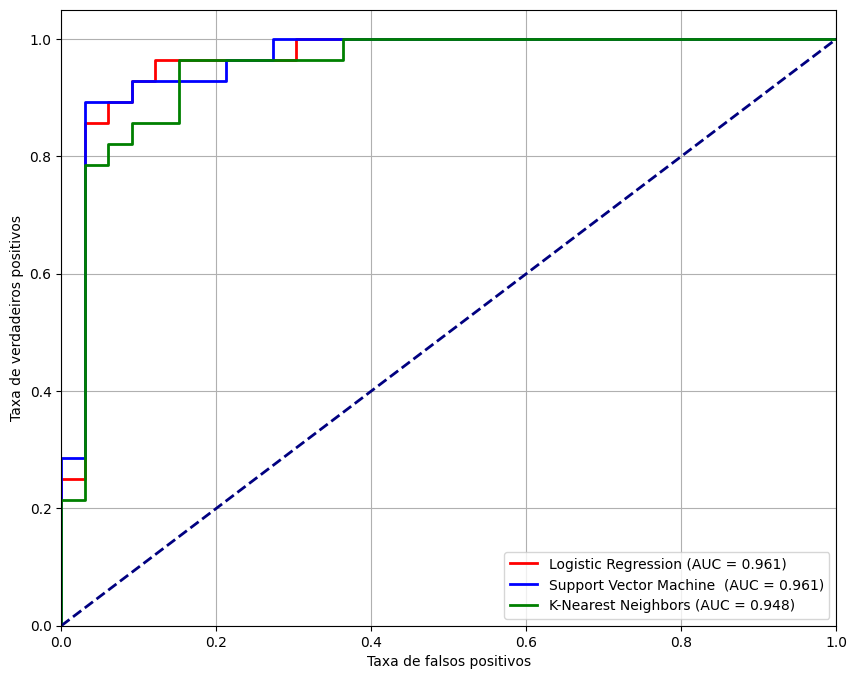

In [26]:
plt.figure(figsize=(10, 8))

models_eval = [
    ('Logistic Regression', lr_eval, 'red'),
    ('Support Vector Machine ', svc_eval, 'blue'),
    ('K-Nearest Neighbors', knn_eval, 'green'),
]

for name, eval_results, color in models_eval:
    fpr, tpr, _ = roc_curve(y_test, eval_results['y_pred_proba'])
    roc_auc = eval_results['roc_auc']
    
    plt.plot(fpr, tpr, color=color, lw=2, label=f'{name} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de falsos positivos')
plt.ylabel('Taxa de verdadeiros positivos')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

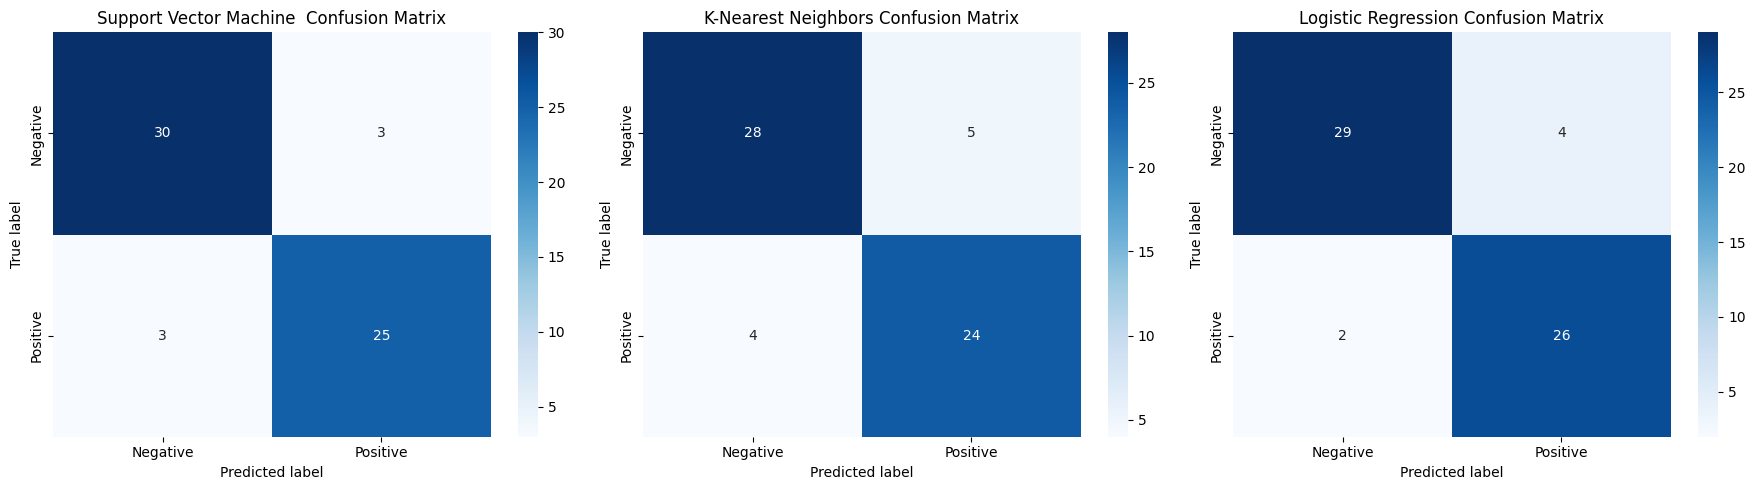

In [27]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

models_eval = [
    ('Support Vector Machine ', svc_eval, axes[0]),
    ('K-Nearest Neighbors', knn_eval, axes[1]),
    ('Logistic Regression', lr_eval, axes[2])
]

for name, eval_results, ax in models_eval:
    cm = eval_results['confusion_matrix']
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')
    ax.set_title(f'{name} Confusion Matrix')
    ax.set_xticklabels(['Negative', 'Positive'])
    ax.set_yticklabels(['Negative', 'Positive'])

plt.tight_layout()
plt.show()

Model Comparison Summary:
           Support Vector Machine   K-Nearest Neighbors  Logistic Regression
Accuracy                  0.901639             0.852459             0.901639
Precision                 0.892857             0.827586             0.866667
Recall                    0.892857             0.857143             0.928571
F1 Score                  0.892857             0.842105             0.896552
ROC-AUC                   0.961039             0.948052             0.961039


<Figure size 1200x800 with 0 Axes>

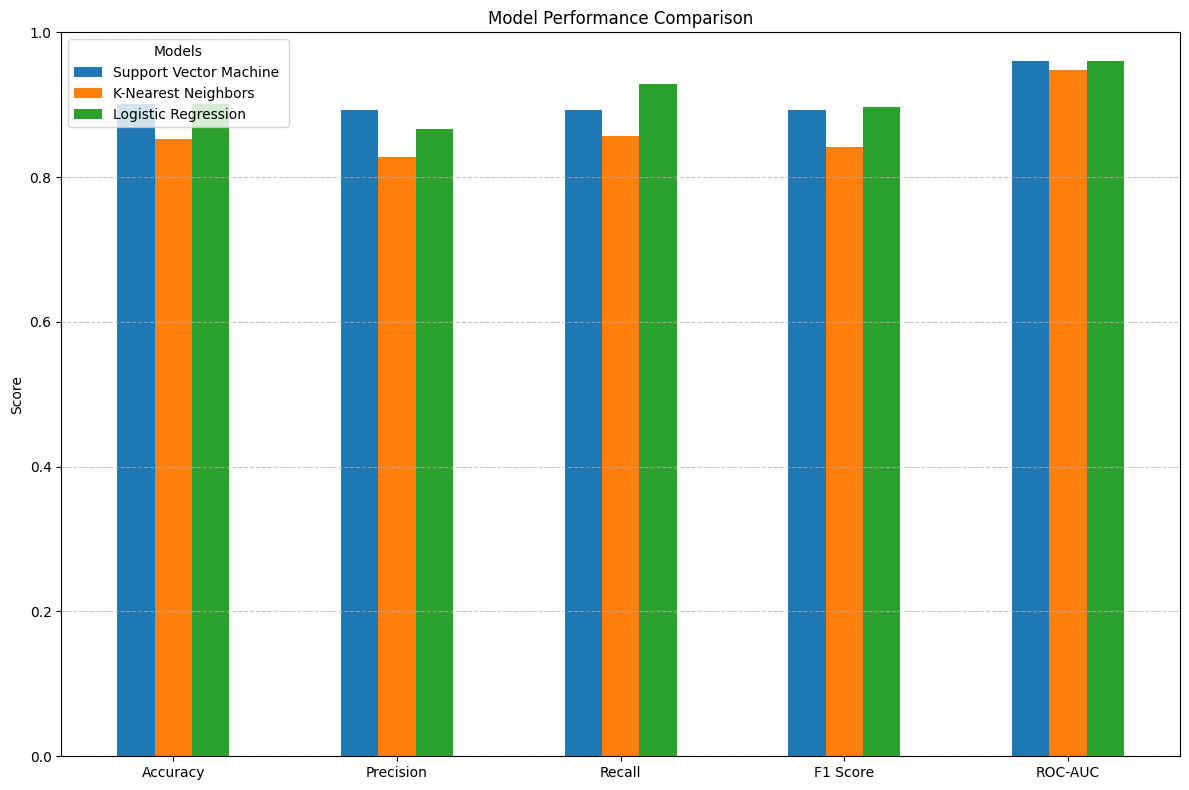

In [28]:
model_comparison = pd.DataFrame({
    'Support Vector Machine ': [
        svc_eval['accuracy'],
        svc_eval['precision'],
        svc_eval['recall'],
        svc_eval['f1_score'],
        svc_eval['roc_auc']
    ],
    'K-Nearest Neighbors': [
        knn_eval['accuracy'],
        knn_eval['precision'],
        knn_eval['recall'],
        knn_eval['f1_score'],
        knn_eval['roc_auc']
    ],
    'Logistic Regression': [
        lr_eval['accuracy'],
        lr_eval['precision'],
        lr_eval['recall'],
        lr_eval['f1_score'],
        lr_eval['roc_auc']
    ]
}, index=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC'])

print("Model Comparison Summary:")
print(model_comparison)

plt.figure(figsize=(12, 8))
model_comparison.plot(kind='bar', figsize=(12, 8))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.ylim(0, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Models')
plt.tight_layout()
plt.show()

### Análise de Importância de Recursos

Vamos analisar quais características contribuem mais para as previsões do nosso melhor modelo.

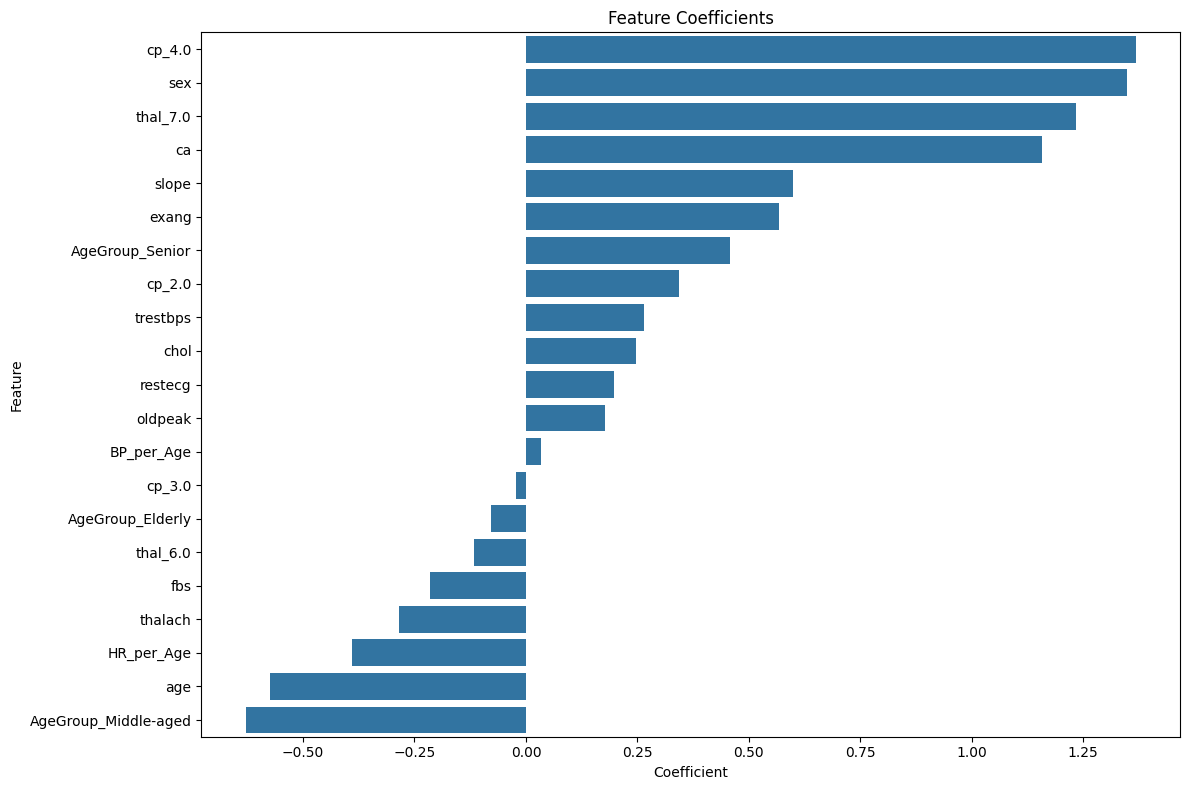

In [29]:
best_model = best_lr

if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': best_model.feature_importances_
    }).sort_values(by='Importance', ascending=False)
    
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance)
    plt.title('Feature Importance')
    plt.tight_layout()
    plt.show()
    
elif hasattr(best_model, 'coef_'):
    coefficients = pd.DataFrame({
        'Feature': X.columns,
        'Coefficient': best_model.coef_[0]
    }).sort_values(by='Coefficient', ascending=False)
    
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Coefficient', y='Feature', data=coefficients)
    plt.title('Feature Coefficients')
    plt.tight_layout()
    plt.show()
else:
    print("Feature importance not available for this model.")

## 5) Salvamento do Melhor Modelo

Vamos salvar nosso modelo de melhor desempenho em disco para que ele possa ser usado em produção ou compartilhado com outros.

In [30]:
import joblib
import os

model_performances = {
    'Logistic Regression': lr_eval['roc_auc'],
    'Support Vector Machine': svc_eval['roc_auc'],
    'Rede Neural (MLP)': knn_eval['roc_auc']
}

best_model_name = max(model_performances, key=model_performances.get)
print(f"The best performing model is: {best_model_name} with ROC-AUC: {model_performances[best_model_name]:.4f}")

model_objects = {
    'Logistic Regression': best_lr,
    'Support Vector Machine': svc_eval,
    'K-Nearest Neighbors': knn_eval
}

best_model = model_objects[best_model_name]

save_dir = 'saved_models'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

model_filename = os.path.join(save_dir, f'{best_model_name.replace(" ", "_").lower()}_model.joblib')
joblib.dump(best_model, model_filename)

scaler_filename = os.path.join(save_dir, 'scaler.joblib')
joblib.dump(scaler, scaler_filename)

preprocessing_info = {
    'numerical_features_to_scale': numerical_features_to_scale,
    'feature_names': list(X.columns)
}
preprocessing_filename = os.path.join(save_dir, 'preprocessing_info.joblib')
joblib.dump(preprocessing_info, preprocessing_filename)

print(f"Model saved to {model_filename}")
print(f"Scaler saved to {scaler_filename}")
print(f"Preprocessing info saved to {preprocessing_filename}")

The best performing model is: Logistic Regression with ROC-AUC: 0.9610
Model saved to saved_models\logistic_regression_model.joblib
Scaler saved to saved_models\scaler.joblib
Preprocessing info saved to saved_models\preprocessing_info.joblib


In [31]:
import joblib

loaded_model = joblib.load(model_filename)
loaded_scaler = joblib.load(scaler_filename)
loaded_preprocessing_info = joblib.load(preprocessing_filename)

sample_index = 0
sample_X = X_test.iloc[[sample_index]]
sample_y = y_test.iloc[sample_index]

sample_pred = loaded_model.predict(sample_X)[0]
sample_pred_proba = loaded_model.predict_proba(sample_X)[0, 1]

print(f"Sample features: {sample_X.values[0]}")
print(f"True label: {'Heart Disease' if sample_y == 1 else 'No Heart Disease'}")
print(f"Predicted label: {'Heart Disease' if sample_pred == 1 else 'No Heart Disease'}")
print(f"Predicted probability of Heart Disease: {sample_pred_proba:.4f}")

Sample features: [0.5054510345141467 1.0 0.35913411307650606 0.47023155978413295 0.0 2.0
 1.4184183897788027 0.0 -0.8968617158532323 1.0 -0.7111313860964096 False
 False True False False False True False 2.3389830508474576
 3.0847457627118646]
True label: No Heart Disease
Predicted label: No Heart Disease
Predicted probability of Heart Disease: 0.3332
